In [39]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [40]:
df= pd.read_csv("D:\Dharmraj\Data science\Deep Learning\Complete-Deep-Learning-master\ANN\Churn_Modelling.csv")

In [41]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [42]:
# Importing the dataset
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

In [43]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [44]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [47]:
#Create dummy variables
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)
geography.head()

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1


In [48]:
# Concatenate the Data Frames

X=pd.concat([X,geography,gender],axis=1)

## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [8]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [9]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [10]:
# Part 2 - Now let's make the ANN!

# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

Using TensorFlow backend.
D:\Anacond\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\Anacond\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\Anacond\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\Anacond\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a s

In [11]:
 #Initialising the ANN
classifier = Sequential()

In [12]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim = 6, init = 'he_uniform',activation='relu',input_dim = 11))

D:\Anacond\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=11, units=6, kernel_initializer="he_uniform")`
  


In [13]:
# Adding the second hidden layer
classifier.add(Dense(output_dim = 6, init = 'he_uniform',activation='relu'))
# Adding the output layer
classifier.add(Dense(output_dim = 1, init = 'glorot_uniform', activation = 'sigmoid'))

D:\Anacond\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="he_uniform")`
  
D:\Anacond\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="glorot_uniform")`
  after removing the cwd from sys.path.


In [14]:
# Compiling the ANN
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [15]:
# Fitting the ANN to the Training set
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, nb_epoch = 100)

D:\Anacond\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  



Train on 5359 samples, validate on 2641 samples
Epoch 1/100
5359/5359 [==============================] - 3s 607us/step - loss: 0.5572 - accuracy: 0.7513 - val_loss: 0.5138 - val_accuracy: 0.7936
Epoch 2/100
5359/5359 [==============================] - 1s 198us/step - loss: 0.4928 - accuracy: 0.7983 - val_loss: 0.4872 - val_accuracy: 0.7955
Epoch 3/100
5359/5359 [==============================] - 1s 190us/step - loss: 0.4690 - accuracy: 0.8041 - val_loss: 0.4699 - val_accuracy: 0.7986
Epoch 4/100
5359/5359 [==============================] - 1s 216us/step - loss: 0.4516 - accuracy: 0.8059 - val_loss: 0.4571 - val_accuracy: 0.8046
Epoch 5/100
5359/5359 [==============================] - 1s 172us/step - loss: 0.4392 - accuracy: 0.8117 - val_loss: 0.4481 - val_accuracy: 0.8065
Epoch 6/100
5359/5359 [==============================] - 1s 174us/step - loss: 0.4287 - accuracy: 0.8177 - val_loss: 0.4400 - val_accuracy: 0.8095
Epoch 7/100
5359/5359 [==============================] - 1s 171us/ste

Epoch 55/100
5359/5359 [==============================] - 1s 206us/step - loss: 0.3411 - accuracy: 0.8569 - val_loss: 0.3705 - val_accuracy: 0.8432
Epoch 56/100
5359/5359 [==============================] - 1s 179us/step - loss: 0.3412 - accuracy: 0.8582 - val_loss: 0.3703 - val_accuracy: 0.8436
Epoch 57/100
5359/5359 [==============================] - 1s 172us/step - loss: 0.3406 - accuracy: 0.8595 - val_loss: 0.3698 - val_accuracy: 0.8459
Epoch 58/100
5359/5359 [==============================] - 1s 203us/step - loss: 0.3405 - accuracy: 0.8591 - val_loss: 0.3699 - val_accuracy: 0.8459
Epoch 59/100
5359/5359 [==============================] - 1s 186us/step - loss: 0.3403 - accuracy: 0.8591 - val_loss: 0.3692 - val_accuracy: 0.8463
Epoch 60/100
5359/5359 [==============================] - 1s 185us/step - loss: 0.3400 - accuracy: 0.8595 - val_loss: 0.3691 - val_accuracy: 0.8440
Epoch 61/100
5359/5359 [==============================] - 1s 187us/step - loss: 0.3396 - accuracy: 0.8602 - val_

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


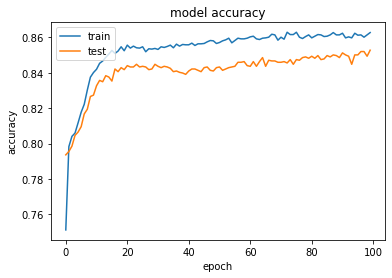

In [26]:
# list all data in history

print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

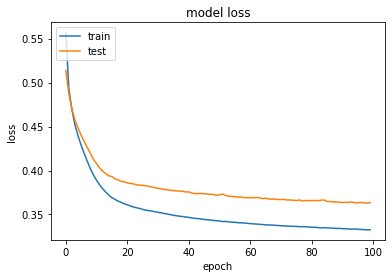

In [18]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [19]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [23]:
 #Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1506,   89],
       [ 204,  201]], dtype=int64)

In [21]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [22]:
score

0.8535

In [51]:
import tensorflow as tf
print(tf.version)
tf.version
tf.__version__

<module 'tensorflow._api.v1.version' from 'D:\\Anacond\\lib\\site-packages\\tensorflow\\_api\\v1\\version\\__init__.py'>


'1.14.0'